## Theory

This notebook is an introduction to the GeoPandas spatial data library. It is based on the article [GeoPandas Tutorial: An Introduction to Geospatial Analysis](https://www.datacamp.com/tutorial/geopandas-tutorial-geospatial-analysis).

__GeoPandas__ is one of the most popular Python libraries for geospatial analysis. It extends the datatypes used by pandas to allow spatial operations on geometric types. GeoPandas relies on a stack of open-source geospatial libraries to deliver its full spatial potential, including shapely, fiona, pyproj, and rtree.

GeoPandas is designed to work with vector data. Shapefile and GeoJSON are some of the most common vector data formats.

__GeoDataFrame__ is a subclass of pandas.DataFrame. That means it inherits many of the methods and attributes of pandas dataframe. What's new in GeoDataFrame is that it can store geometry columns (also known as __GeoSeries__) and perform spatial operations. The geometry column can contain any type of vector data, such as points, lines, and polygons.

Every GeoSeries comes with associated __CRS__ information. This CRS information tells GeoPandas where the coordinates are located on Earth. For example, if you need to combine two spatial datasets, you need to make sure they are expressed in the same CRS. There are two main categories of CRS:
* __Geographic coordinates__ - define a global position in degrees of latitude and longitude relative to the equator and the prime meridian. 
* __Projected coordinates__ - express locations in X and Y dimensions, thereby allowing us to work with a length unit, such as meters, instead of degrees, which makes the analysis more convenient and effective.

## Import libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import geopandas as geopd
from shapely.geometry import Point
import contextily
import matplotlib.pyplot as plt

## Basic operations

In [2]:
path = 'https://raw.githubusercontent.com/jcanalesluna/bcn-geodata/master/districtes/districtes.geojson'
districts = geopd.read_file(path)
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18345 41.39061, 2.18459 41.38976, ..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.18690 41.40165, 2.18689 41.40087, ..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.14824 41.37623, 2.14896 41.3..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((2.10342 41.40110, 2.10352 41.40109, ..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((2.07313 41.43522, 2.07319 41.4..."


In [3]:
districts.columns

Index(['ID_ANNEX', 'ANNEXDESCR', 'ID_TEMA', 'TEMA_DESCR', 'ID_CONJUNT',
       'CONJ_DESCR', 'ID_SUBCONJ', 'SCONJ_DESC', 'ID_ELEMENT', 'ELEM_DESCR',
       'NIVELL', 'NDESCR_CA', 'NDESCR_ES', 'NDESCR_EN', 'TERME', 'DISTRICTE',
       'BARRI', 'AEB', 'SEC_CENS', 'GRANBARRI', 'ZUA', 'AREA_I', 'LITERAL',
       'PERIMETRE', 'AREA', 'ORD_REPRES', 'CODI_UA', 'TIPUS_UA', 'NOM', 'WEB1',
       'WEB2', 'WEB3', 'DOCUMENTA', 'RANGESCALA', 'TIPUS_POL', 'GRUIX_ID',
       'GRUIXDIMEN', 'ESTIL_ID', 'ESTIL_QGIS', 'VALOR1QGIS', 'VALOR2QGIS',
       'COL_FARCIT', 'FCOL_DESCR', 'FHEX_COLOR', 'COL_DESCR', 'HEX_COLOR7',
       'geometry'],
      dtype='object')

In [4]:
districts.shape

(10, 47)

In [5]:
districts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [6]:
districts.to_crs(epsg=2062, inplace=True)
districts.crs

<Projected CRS: EPSG:2062>
Name: Madrid 1870 (Madrid) / Spain LCC
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Spain - mainland onshore.
- bounds: (-9.37, 35.95, 3.39, 43.82)
Coordinate Operation:
- name: Spain
- method: Lambert Conic Conformal (1SP)
Datum: Madrid 1870 (Madrid)
- Ellipsoid: Struve 1860
- Prime Meridian: Madrid

## Exploring the attributes of spatial dataset

In [7]:
districts['area_km2'] = districts.area / 1000000
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,area_km2
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.200406
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.456303
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1087409.714 768620.322, 108747...",22.854384
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1083492.496 771129.964, 1083500.768 ...",6.004220
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,Sòlid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1080722.370 774743.807, 108072...",19.894238


In [8]:
districts['centroid']=districts.centroid
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,area_km2,centroid
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.200406,POINT (1090083.871 769341.012)
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.456303,POINT (1088651.674 770409.974)
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1087409.714 768620.322, 108747...",22.854384,POINT (1087284.958 765672.155)
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1083492.496 771129.964, 1083500.768 ...",6.004220,POINT (1084830.283 769641.619)
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1080722.370 774743.807, 108072...",19.894238,POINT (1083668.091 772419.768)


In [9]:
districts['boundary']=districts.boundary
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,area_km2,centroid,boundary
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.200406,POINT (1090083.871 769341.012),"LINESTRING (1090241.744 770405.596, 1090342.58..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.456303,POINT (1088651.674 770409.974),"LINESTRING (1090448.237 771647.183, 1090453.69..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1087409.714 768620.322, 108747...",22.854384,POINT (1087284.958 765672.155),"MULTILINESTRING ((1087409.714 768620.322, 1087..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"POLYGON ((1083492.496 771129.964, 1083500.768 ...",6.004220,POINT (1084830.283 769641.619),"LINESTRING (1083492.496 771129.964, 1083500.76..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1080722.370 774743.807, 108072...",19.894238,POINT (1083668.091 772419.768),"MULTILINESTRING ((1080722.370 774743.807, 1080..."


In [10]:
sagrada_familia = Point(2.1743680500855005, 41.403656946781304)
sagrada_familia = geopd.GeoSeries(sagrada_familia, crs=4326)
sagrada_familia = sagrada_familia.to_crs(epsg=2062)
sagrada_familia

0    POINT (1089389.220 771800.046)
dtype: geometry

In [11]:
districts['sagrada_familia_dist'] = [float(sagrada_familia.distance(centroid)) / 1000 for centroid in districts.centroid]
districts.head()

,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry,area_km2,centroid,boundary,sagrada_familia_dist
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,1,Negre,#000000,Negre,#000000,"POLYGON ((1090241.744 770405.596, 1090342.582 ...",4.200406,POINT (1090083.871 769341.012),"LINESTRING (1090241.744 770405.596, 1090342.58...",2.555267
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,1,Negre,#000000,Negre,#000000,"POLYGON ((1090448.237 771647.183, 1090453.694 ...",7.456303,POINT (1088651.674 770409.974),"LINESTRING (1090448.237 771647.183, 1090453.69...",1.573619
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1087409.714 768620.322, 108747...",22.854384,POINT (1087284.958 765672.155),"MULTILINESTRING ((1087409.714 768620.322, 1087...",6.479118
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,1,Negre,#000000,Negre,#000000,"POLYGON ((1083492.496 771129.964, 1083500.768 ...",6.004220,POINT (1084830.283 769641.619),"LINESTRING (1083492.496 771129.964, 1083500.76...",5.044077
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,Límit de districte,...,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((1080722.370 774743.807, 108072...",19.894238,POINT (1083668.091 772419.768),"MULTILINESTRING ((1080722.370 774743.807, 1080...",5.754595


## Plotting with GeoPandas

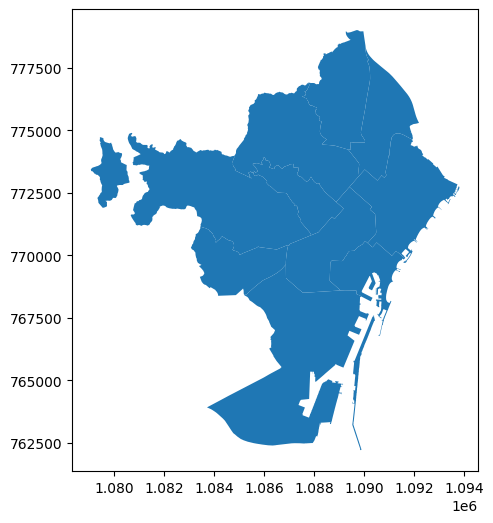

In [12]:
ax = districts.plot(figsize=(10,6))

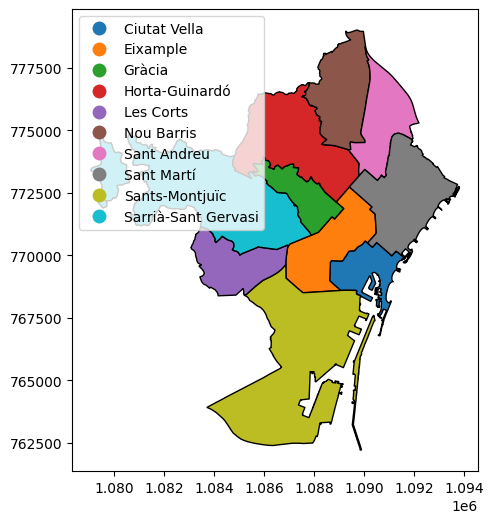

In [13]:
ax = districts.plot(column='NOM', figsize=(10,6), edgecolor='black', legend=True, 
                    legend_kwds={'loc': 'upper left'})

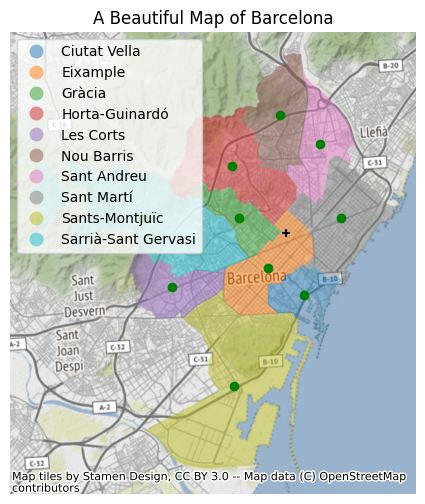

In [14]:
ax = districts.plot(column='NOM', figsize=(10, 6), alpha=0.5, legend=True, legend_kwds={'loc': 'upper left'})
districts["centroid"].plot(ax=ax, color="green")
sagrada_familia.plot(ax=ax,color='black', marker='+')
contextily.add_basemap(ax, crs=districts.crs.to_string())
plt.title('A Beautiful Map of Barcelona')
plt.axis('off');

## Spatial Relationships with GeoPandas

In [15]:
# districts.to_file("districts.geojson", driver="GeoJSON")